In [1]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set a visual style for the plots
sns.set_style("whitegrid")

In [2]:
# =============================================================================
# # 2. DATA LOADING
# =============================================================================
# Load the dataset. We'll remove headers, footers, and quotes to focus on the text content.
# To make topics more distinct, we'll select a subset of categories.
categories = [
    'rec.sport.baseball',
    'sci.space',
    'comp.graphics',
    'soc.religion.christian',
    'talk.politics.guns',
]
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

df = pd.DataFrame({'text': newsgroups_train.data})

print("--- Sample of the Dataset ---")
print(df['text'].iloc[0][:500]) # Print the first 500 characters of the first document
print(f"\nLoaded {len(df)} documents.")

--- Sample of the Dataset ---

Lets hear it for Dan Goldin...now if he can only convince the rest of
our federal government that the space program is a worth while
investment!

I hope that I will live to see the day we walk on Mars, but
we need to address the technical hurdles first!  If there's sufficient
interest, maybe we should consider starting a sci.space group 
devoted to the technical analysis of long-duration human spaceflight.
Most of you regulars know that I'm interested in starting this analysis
as soon as possib

Loaded 2919 documents.


In [4]:
# =============================================================================
# # 3. TEXT VECTORIZATION (TF-IDF)
# =============================================================================
# We convert the text into a matrix of TF-IDF features.
# max_df=0.95: ignore terms that appear in more than 95% of documents (too common)
# min_df=2: ignore terms that appear in less than 2 documents (too rare)
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['text'])

print("--- Text Vectorization Complete ---")
print(f"Shape of the TF-IDF matrix: {X.shape}")

--- Text Vectorization Complete ---
Shape of the TF-IDF matrix: (2919, 15571)


In [5]:
# =============================================================================
# # 4. TRAINING THE LDA TOPIC MODEL
# =============================================================================
# We define the number of topics we want the model to find.
# Since we selected 5 categories, let's set n_components=5.
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

print("--- LDA Model Training Complete ---")

--- LDA Model Training Complete ---


--- Discovered Topics and their Top Words ---
Topic 1:
03 ether 02 chuck navy navigation 00 hello beacons hypocritical
Topic 2:
god don like just know people think does good time
Topic 3:
launch mars ssto nasa allen rocket moon titan cheaper space
Topic 4:
marriage militia church pope married cview cell liturgy temp files
Topic 5:
handheld jmd baerga thanks wip algorithm pd surfaces bo farr


C:\Users\RIYA\AppData\Local\Temp\ipykernel_11168\2052704933.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words_scores, y=top_words, palette='viridis')


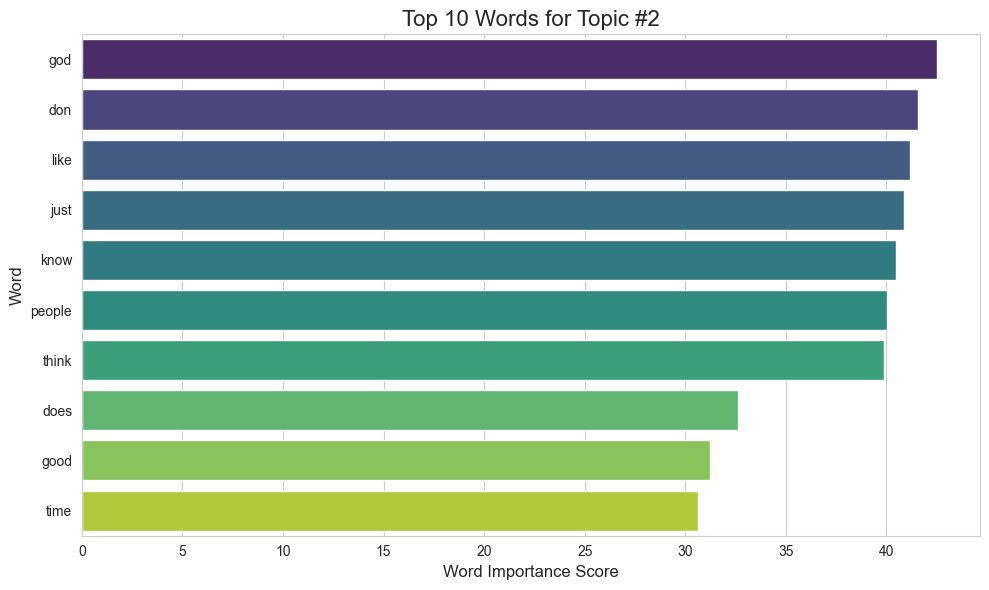

In [6]:
# =============================================================================
# # 5. INTERPRETING THE TOPICS
# =============================================================================
# This is the most important part: seeing the words that define each topic.
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()

print("--- Discovered Topics and their Top Words ---")
display_topics(lda, feature_names, no_top_words)

# --- VISUALIZE A SINGLE TOPIC ---
# Let's create a bar chart for the top words of one topic for our LinkedIn post.
topic_idx_to_plot = 1 # Change this index to plot a different topic
topic = lda.components_[topic_idx_to_plot]
top_words_indices = topic.argsort()[:-no_top_words - 1:-1]
top_words = [feature_names[i] for i in top_words_indices]
top_words_scores = [topic[i] for i in top_words_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_words_scores, y=top_words, palette='viridis')
plt.title(f'Top {no_top_words} Words for Topic #{topic_idx_to_plot+1}', fontsize=16)
plt.xlabel('Word Importance Score', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.savefig('topic_visualization.png')
plt.show()